___
# Ciência dos Dados - PROJETO 1


### <font color=Grey>Guilherme Lotaif e Bruno Kaczelnik</font>
___

## Estudo dos brasileiros mais economicamente ativos

___
## Introdução

Neste projeto nós vamos analisar os dados da PNAD (Pesquisa Nacional por Amostra de Domicílios), que investiga anualmente as características da população. Este levantamento é um importante instrumento para o estudo socioeconômico do Brasil. 

A partir dos dados de 2011 e 2015 vamos fazer um estudo para identificar dentro do perfil dos `brasileiros economicamente ativos`, quais são os grupos sociais com **maior número de pessoas ativas**.


___
## Filtros da base de dados

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import warnings
import matplotlib.cbook
plt.style.use('ggplot')

In [23]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/guilherme/Downloads


...
### Vamos abrir os arquivos:

Os arquivos que serão usados nesse projeto são 2 arquivos csv, com todas informações coletadas pela PNAD, esses dados precisarão ser formatados visando fazer a análise dos mesmos.

In [24]:
#Abrindo o arquivo com os dados de 2011:
All_data_2011 = pd.read_csv('PES2011.csv',sep=',')

In [25]:
#Analisando os tipos de informações no arquivo:
All_data_2011.get_dtype_counts()

float64    294
int64       30
dtype: int64

In [26]:
#Tabela do dataset(2011) pré-formatação:
All_data_2011.sample(2)

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
333364,2011,51,51000000.0,34,3,2,21,7,1994,17,...,5.0,212.0,2.0,4,2.0,NaN,NaN,2.0,212.0,20100000.0
133569,2011,28,28000000.0,2,4,4,14,9,1988,23,...,4.0,279.0,3.0,6,2.0,NaN,NaN,2.0,279.0,20100000.0


In [27]:
#Abrindo o arquivo com os dados de 2015:
All_data_2015 = pd.read_csv('PES2015.csv',sep=',')

In [28]:
#Analisando os tipos de informações no arquivo:
All_data_2015.get_dtype_counts()

float64    296
int64       33
dtype: int64

In [29]:
#Tabela do dataset(2015) pré-formatação:
All_data_2015.sample(2)

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
12186,12186,2015,13,225,3,2,4,13,12,1980,...,9.0,104.0,1.0,2,2.0,NaN,NaN,2.0,156.0,20161117
308128,308128,2015,43,4245,5,1,2,28,1,1983,...,1.0,1400.0,4.0,6,1.0,2.0,2.0,1.0,1400.0,20161117


...
### Vamos selecionar as váriaveis pertinentes para 2011:

In [30]:
#Vamos criar um dataframe com as váriaveis selecionadas:
df = ["UF","V0302","V8005","V0404","V0601","V6007","V9532","V9058","V9891","V4704"]

In [31]:
#Renomeando as colunas do dataframe:
df_2011 = All_data_2011[df]
df_2011.columns = ["UF", "Sexo", "Idade do morador", "Cor ou raça", "Sabe ler e escrever", "Curso mais elevado que cursou","Rendimento mensal",
        "Número de horas trabalhadas por semana no trabalho", "Idade com que começou a trabalhar", "Condição de atividade"]

...
#### Atribuindo as características das váriaveis:

In [32]:
#Suprimindo o aviso de copia de dataframe:
pd.set_option('chained_assignment',None)

In [33]:
#-UF:
df_2011.loc[(df_2011["UF"] == 11),"UF"] = "Rondônia"
df_2011.loc[(df_2011["UF"] == 12),"UF"] = "Acre"
df_2011.loc[(df_2011["UF"] == 13),"UF"] = "Amazonas"
df_2011.loc[(df_2011["UF"] == 14),"UF"] = "Roraima"
df_2011.loc[(df_2011["UF"] == 15),"UF"] = "Pará"
df_2011.loc[(df_2011["UF"] == 16),"UF"] = "Amapá"
df_2011.loc[(df_2011["UF"] == 17),"UF"] = "Tocantins"
df_2011.loc[(df_2011["UF"] == 21),"UF"] = "Maranhão"
df_2011.loc[(df_2011["UF"] == 22),"UF"] = "Piauí"
df_2011.loc[(df_2011["UF"] == 23),"UF"] = "Ceará"
df_2011.loc[(df_2011["UF"] == 24),"UF"] = "Rio Grande do Norte"
df_2011.loc[(df_2011["UF"] == 25),"UF"] = "Praíba"
df_2011.loc[(df_2011["UF"] == 26),"UF"] = "Pernambuco"
df_2011.loc[(df_2011["UF"] == 27),"UF"] = "Alagoas"
df_2011.loc[(df_2011["UF"] == 28),"UF"] = "Sergipe"
df_2011.loc[(df_2011["UF"] == 29),"UF"] = "Bahia"
df_2011.loc[(df_2011["UF"] == 31),"UF"] = "Minas Gerais"
df_2011.loc[(df_2011["UF"] == 32),"UF"] = "Espirito Santo"
df_2011.loc[(df_2011["UF"] == 33),"UF"] = "Rio de Janeiro"
df_2011.loc[(df_2011["UF"] == 35),"UF"] = "São Paulo"
df_2011.loc[(df_2011["UF"] == 41),"UF"] = "Paraná"
df_2011.loc[(df_2011["UF"] == 42),"UF"] = "Santa Catarina"
df_2011.loc[(df_2011["UF"] == 43),"UF"] = "Rio Grande do Sul"
df_2011.loc[(df_2011["UF"] == 50),"UF"] = "Mato Grosso do Sul"
df_2011.loc[(df_2011["UF"] == 51),"UF"] = "Mato Grosso"
df_2011.loc[(df_2011["UF"] == 52),"UF"] = "Goiás"
df_2011.loc[(df_2011["UF"] == 53),"UF"] = "Distrito Federal"

In [34]:
#-Sexo:
df_2011.loc[(df_2011.Sexo == 2),"Sexo"] = "Masculino"
df_2011.loc[(df_2011.Sexo == 4),"Sexo"] = "Feminino"

In [35]:
#-Cor ou raça:
df_2011.loc[(df_2011["Cor ou raça"] == 2),"Cor ou raça"] = "Branca"
df_2011.loc[(df_2011["Cor ou raça"] == 4),"Cor ou raça"] = "Preta"
df_2011.loc[(df_2011["Cor ou raça"] == 6),"Cor ou raça"] = "Amarela"
df_2011.loc[(df_2011["Cor ou raça"] == 8),"Cor ou raça"] = "Pardo"
df_2011.loc[(df_2011["Cor ou raça"] == 0),"Cor ou raça"] = "Indigena"
df_2011.loc[(df_2011["Cor ou raça"] == 9),"Cor ou raça"] = "Sem declaração"

In [36]:
#-Sabe ler e escrever:
df_2011.loc[(df_2011["Sabe ler e escrever"] == 1),"Sabe ler e escrever"] = "Sim"
df_2011.loc[(df_2011["Sabe ler e escrever"] == 3),"Sabe ler e escrever"] = "Não"

In [37]:
#-Curso mais elevado que cursou:
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 1),"Curso mais elevado que cursou"] = "Elementar (Primário)"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 2),"Curso mais elevado que cursou"] = "Médio 1˚ ciclo"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 3),"Curso mais elevado que cursou"] = "Médio 2˚ ciclo"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 4),"Curso mais elevado que cursou"] = "Regular do ensino Fundamental"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 5),"Curso mais elevado que cursou"] = "Regular do ensino Médio"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 6),"Curso mais elevado que cursou"] = "Supletivo do ensino Fundamental"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 7),"Curso mais elevado que cursou"] = "Supletivo do ensino Médio"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 8),"Curso mais elevado que cursou"] = "Superior de graduação"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 9),"Curso mais elevado que cursou"] = "Mestrado ou doutorado"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 10),"Curso mais elevado que cursou"] = "Alfabetização para jovens adultos"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 11),"Curso mais elevado que cursou"] = "Creche"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 12),"Curso mais elevado que cursou"] = "Classe de alfabetização - CA"
df_2011.loc[(df_2011["Curso mais elevado que cursou"] == 13),"Curso mais elevado que cursou"] = "Jardim da infância"
df_2011.loc[(df_2011["Curso mais elevado que cursou"].isnull() == True),"Curso mais elevado que cursou"] = "Não aplicável"

In [38]:
#-Rendimento mensal: 
df_2011["Rendimento mensal"].loc[df_2011["Rendimento mensal"]>=999999999999]="Sem declarações"
df_2011.loc[(df_2011["Rendimento mensal"].isnull() == True),"Rendimento mensal"] = "Não aplicável"

In [39]:
#-Número de horas trabalhadas por semana no trabalho principal:
df_2011.loc[(df_2011["Número de horas trabalhadas por semana no trabalho"].isnull() == True),"Número de horas trabalhadas por semana no trabalho"] = "Não aplicável"

In [40]:
#-Idade com que começou a trabalhar:
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 1),"Idade com que começou a trabalhar"] = "Até 9 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 2),"Idade com que começou a trabalhar"] = "10 a 14 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 3),"Idade com que começou a trabalhar"] = "15 a 17 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 4),"Idade com que começou a trabalhar"] = "18 a 19 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 5),"Idade com que começou a trabalhar"] = "20 a 24 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 6),"Idade com que começou a trabalhar"] = "25 a 29 anos"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"] == 7),"Idade com que começou a trabalhar"] = "30 anos ou  mais"
df_2011.loc[(df_2011["Idade com que começou a trabalhar"].isnull() == True),"Idade com que começou a trabalhar"] = "Não aplicável"

In [41]:
#-Condição de atividade:
df_2011.loc[(df_2011["Condição de atividade"] == 1),"Condição de atividade"] = "Economicamente ativas"
df_2011.loc[(df_2011["Condição de atividade"] == 2),"Condição de atividade"] = "Não economicamente ativas"
df_2011.loc[(df_2011["Condição de atividade"].isnull() == True),"Condição de atividade"] = "Não aplicável"

In [42]:
#Tabela do dataset(2011) pós-formatação:
df_2011.sample(30)

,UF,Sexo,Idade do morador,Cor ou raça,Sabe ler e escrever,Curso mais elevado que cursou,Rendimento mensal,Número de horas trabalhadas por semana no trabalho,Idade com que começou a trabalhar,Condição de atividade
297,Rondônia,Masculino,10,Pardo,Sim,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não economicamente ativas
149560,Bahia,Feminino,14,Pardo,Sim,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não economicamente ativas
22892,Roraima,Feminino,55,Branca,Sim,Elementar (Primário),Não aplicável,Não aplicável,15 a 17 anos,Não economicamente ativas
76971,Ceará,Feminino,23,Pardo,Sim,Regular do ensino Médio,Não aplicável,Não aplicável,Não aplicável,Economicamente ativas
46951,Pará,Masculino,74,Pardo,Sim,Elementar (Primário),90,70,Até 9 anos,Economicamente ativas
209954,Rio de Janeiro,Masculino,50,Pardo,Sim,Superior de graduação,2600,40,15 a 17 anos,Economicamente ativas
319333,Rio Grande do Sul,Feminino,76,Branca,Não,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não economicamente ativas
112606,Pernambuco,Feminino,62,Branca,Sim,Regular do ensino Fundamental,Não aplicável,Não aplicável,Não aplicável,Não economicamente ativas
84234,Ceará,Feminino,17,Pardo,Sim,Não aplicável,Não aplicável,Não aplicável,Não aplicável,Não economicamente ativas
4637,Rondônia,Feminino,57,Branca,Sim,Supletivo do ensino Médio,Não aplicável,Não aplicável,Não aplicável,Não economicamente ativas


...
### Vamos selecionar as váriaveis pertinentes para 2015:

In [43]:
#Vamos criar um dataframe com as váriaveis selecionadas:
df = ["UF","V0302","V8005","V0404","V0601","V6007","V9058","V9891","V4704"]

In [44]:
#Renomeando as colunas do dataframe:
df_2015 = All_data_2015[df]
df_2015.columns = ["UF", "Sexo", "Idade do morador", "Cor ou raça", "Sabe ler e escrever", "Curso mais elevado que cursou",
        "Número de horas trabalhadas por semana no trabalho", "Idade com que começou a trabalhar", "Condição de atividade"]

...
#### Atribuindo as características das váriaveis:

In [45]:
#-UF:
df_2015.loc[(df_2015["UF"] == 11),"UF"] = "Rondônia"
df_2015.loc[(df_2015["UF"] == 12),"UF"] = "Acre"
df_2015.loc[(df_2015["UF"] == 13),"UF"] = "Amazonas"
df_2015.loc[(df_2015["UF"] == 14),"UF"] = "Roraima"
df_2015.loc[(df_2015["UF"] == 15),"UF"] = "Pará"
df_2015.loc[(df_2015["UF"] == 16),"UF"] = "Amapá"
df_2015.loc[(df_2015["UF"] == 17),"UF"] = "Tocantins"
df_2015.loc[(df_2015["UF"] == 21),"UF"] = "Maranhão"
df_2015.loc[(df_2015["UF"] == 22),"UF"] = "Piauí"
df_2015.loc[(df_2015["UF"] == 23),"UF"] = "Ceará"
df_2015.loc[(df_2015["UF"] == 24),"UF"] = "Rio Grande do Norte"
df_2015.loc[(df_2015["UF"] == 25),"UF"] = "Praíba"
df_2015.loc[(df_2015["UF"] == 26),"UF"] = "Pernambuco"
df_2015.loc[(df_2015["UF"] == 27),"UF"] = "Alagoas"
df_2015.loc[(df_2015["UF"] == 28),"UF"] = "Sergipe"
df_2015.loc[(df_2015["UF"] == 29),"UF"] = "Bahia"
df_2015.loc[(df_2015["UF"] == 31),"UF"] = "Minas Gerais"
df_2015.loc[(df_2015["UF"] == 32),"UF"] = "Espirito Santo"
df_2015.loc[(df_2015["UF"] == 33),"UF"] = "Rio de Janeiro"
df_2015.loc[(df_2015["UF"] == 35),"UF"] = "São Paulo"
df_2015.loc[(df_2015["UF"] == 41),"UF"] = "Paraná"
df_2015.loc[(df_2015["UF"] == 42),"UF"] = "Santa Catarina"
df_2015.loc[(df_2015["UF"] == 43),"UF"] = "Rio Grande do Sul"
df_2015.loc[(df_2015["UF"] == 50),"UF"] = "Mato Grosso do Sul"
df_2015.loc[(df_2015["UF"] == 51),"UF"] = "Mato Grosso"
df_2015.loc[(df_2015["UF"] == 52),"UF"] = "Goiás"
df_2015.loc[(df_2015["UF"] == 53),"UF"] = "Distrito Federal"

In [46]:
#-Sexo:
df_2015.loc[(df_2015.Sexo == 2),"Sexo"] = "Masculino"
df_2015.loc[(df_2015.Sexo == 4),"Sexo"] = "Feminino"

In [47]:
#-Cor ou raça:
df_2015.loc[(df_2015["Cor ou raça"] == 2),"Cor ou raça"] = "Branca"
df_2015.loc[(df_2015["Cor ou raça"] == 4),"Cor ou raça"] = "Preta"
df_2015.loc[(df_2015["Cor ou raça"] == 6),"Cor ou raça"] = "Amarela"
df_2015.loc[(df_2015["Cor ou raça"] == 8),"Cor ou raça"] = "Pardo"
df_2015.loc[(df_2015["Cor ou raça"] == 0),"Cor ou raça"] = "Indigena"
df_2015.loc[(df_2015["Cor ou raça"] == 9),"Cor ou raça"] = "Sem declaração"

In [48]:
#-Sabe ler e escrever:
df_2015.loc[(df_2015["Sabe ler e escrever"] == 1),"Sabe ler e escrever"] = "Sim"
df_2015.loc[(df_2015["Sabe ler e escrever"] == 3),"Sabe ler e escrever"] = "Não"

In [49]:
#-Curso mais elevado que cursou:
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 1),"Curso mais elevado que cursou"] = "Elementar (Primário)"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 2),"Curso mais elevado que cursou"] = "Médio 1˚ ciclo"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 3),"Curso mais elevado que cursou"] = "Médio 2˚ ciclo"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 4),"Curso mais elevado que cursou"] = "Regular do ensino Fundamental"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 5),"Curso mais elevado que cursou"] = "Regular do ensino Médio"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 6),"Curso mais elevado que cursou"] = "Supletivo do ensino Fundamental"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 7),"Curso mais elevado que cursou"] = "Supletivo do ensino Médio"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 8),"Curso mais elevado que cursou"] = "Superior de graduação"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 9),"Curso mais elevado que cursou"] = "Mestrado ou doutorado"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 10),"Curso mais elevado que cursou"] = "Alfabetização para jovens adultos"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 11),"Curso mais elevado que cursou"] = "Creche"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 12),"Curso mais elevado que cursou"] = "Classe de alfabetização - CA"
df_2015.loc[(df_2015["Curso mais elevado que cursou"] == 13),"Curso mais elevado que cursou"] = "Jardim da infância"
df_2015.loc[(df_2015["Curso mais elevado que cursou"].isnull() == True),"Curso mais elevado que cursou"] = "Não aplicável"

In [50]:
#-Número de horas trabalhadas por semana no trabalho principal:
df_2015.loc[(df_2015["Número de horas trabalhadas por semana no trabalho"].isnull() == True),"Número de horas trabalhadas por semana no trabalho"] = "Não aplicável"

In [51]:
#-Idade com que começou a trabalhar:
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 1),"Idade com que começou a trabalhar"] = "Até 9 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 2),"Idade com que começou a trabalhar"] = "10 a 14 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 3),"Idade com que começou a trabalhar"] = "15 a 17 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 4),"Idade com que começou a trabalhar"] = "18 a 19 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 5),"Idade com que começou a trabalhar"] = "20 a 24 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 6),"Idade com que começou a trabalhar"] = "25 a 29 anos"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"] == 7),"Idade com que começou a trabalhar"] = "30 anos ou  mais"
df_2015.loc[(df_2015["Idade com que começou a trabalhar"].isnull() == True),"Idade com que começou a trabalhar"] = "Não aplicável"

In [52]:
#-Condição de atividade:
df_2015.loc[(df_2015["Condição de atividade"] == 1),"Condição de atividade"] = "Economicamente ativas"
df_2015.loc[(df_2015["Condição de atividade"] == 2),"Condição de atividade"] = "Não economicamente ativas"
df_2015.loc[(df_2015["Condição de atividade"].isnull() == True),"Condição de atividade"] = "Não aplicável"

In [53]:
#Tabela do dataset(2015) pós-formatação:
df_2015.sample(2)

,UF,Sexo,Idade do morador,Cor ou raça,Sabe ler e escrever,Curso mais elevado que cursou,Número de horas trabalhadas por semana no trabalho,Idade com que começou a trabalhar,Condição de atividade
77201,Ceará,Feminino,37,Pardo,Sim,Superior de graduação,40,20 a 24 anos,Economicamente ativas
120426,Pernambuco,Masculino,40,Pardo,Sim,Regular do ensino Fundamental,40,25 a 29 anos,Economicamente ativas


___
## Análise e Resultados

Vamos descobrir um pouco mais sobre os dados coletados pela pesquisa.

### O sexo da pessoa influência sua condição econômica?

In [54]:
#Vamos descobrir quantos por cento do dataframe é composto por cada sexo:
o_sexo = (df_2015["Sexo"].value_counts(normalize='index')*100).round(decimals=1)
o_sexo

Feminino     51.5
Masculino    48.5
Name: Sexo, dtype: float64

**Desses, quantos será que sabem ler e escrever?**

In [55]:
#Criando uma tabela cruzada em porcentagem:
sexo_e_ler = (pd.crosstab(df_2015["Sabe ler e escrever"], df_2015.Sexo, margins=True, rownames=['SABE LER E ESCREVER'], colnames=['SEXO'], normalize='index')*100).round(decimals=0)
sexo_e_ler

SEXO,Feminino,Masculino
SABE LER E ESCREVER,,
Não,49.0,51.0
Sim,52.0,48.0
All,51.0,49.0


Agora considerando somente as pessoas que completaram o ensino médio ou superior, será que tem uma qunatidade maior de homens do que de mulheres com essas etapas concluidas?

In [56]:
#Vamos separar as duas etapas para serem analisadas:
Etapas = df_2015["Curso mais elevado que cursou"].loc[(df_2015["Curso mais elevado que cursou"] == "Regular do ensino Médio")|(df_2015["Curso mais elevado que cursou"] == "Superior de graduação")]
#Criando uma tabela cruzada em porcentagem:
sexo_etapas = (pd.crosstab(Etapas, df_2015.Sexo,margins=True, rownames=['NÍVEL DE GRADUAÇÃO'], colnames=['SEXO'], normalize='index')*100).round(decimals=0)
sexo_etapas

SEXO,Feminino,Masculino
NÍVEL DE GRADUAÇÃO,,
Regular do ensino Médio,53.0,47.0
Superior de graduação,58.0,42.0
All,54.0,46.0


...

**Sabendo que ambos sexos tem praticamente a mesma taxa pessoas que sabem ler e escrever, será que essa proporcionalidade tambem se mantem para sua condição de atividade?**

In [57]:
#Criando uma tabela cruzada em porcentagem:
sexo_condicao = (pd.crosstab(df_2015["Condição de atividade"], df_2015.Sexo))
sexo_condicao

Sexo,Feminino,Masculino
Condição de atividade,,
Economicamente ativas,80062,103027
Não aplicável,23501,24804
Não economicamente ativas,80118,45392


Analisando a frequência dos mesmos dados:

In [58]:
#Suprimindo o aviso de depreciação:
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

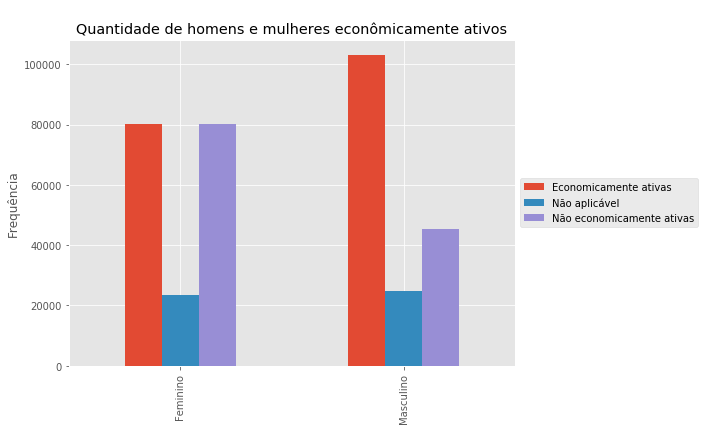

In [59]:
sexo_condicao2 = (pd.crosstab(df_2015.Sexo, df_2015["Condição de atividade"]))

#Criando uma tabela com os dados da condição econômica e os sexos:
plot = sexo_condicao2.plot(kind='bar',figsize=(8, 6))
ax = plt.subplot(111)
plt.title("\nQuantidade de homens e mulheres econômicamente ativos")
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Frequência')
plt.xlabel('')
plt.show()



### A idade influência a condição econômica da pessoa?

Primeiro vamos analisar as faixas de idade que as pessoas começaram a trabalhar:

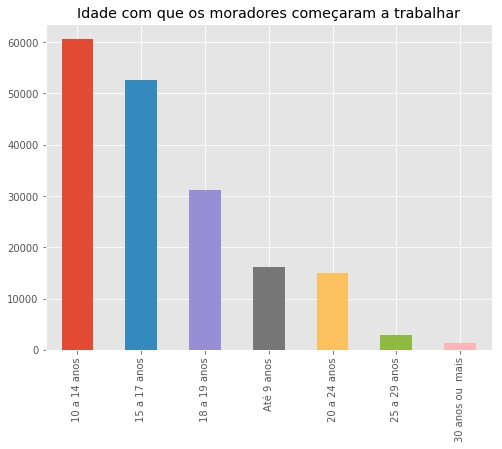

In [60]:
#Criando um gráfico com as faixas de idades que as pessoas começaram a trabalhar:
df_2015["Idade com que começou a trabalhar"].loc[df_2015["Idade com que começou a trabalhar"]!="Não aplicável"].value_counts().plot("bar", figsize=(8,6));
plt.title("Idade com que os moradores começaram a trabalhar")
plt.show()

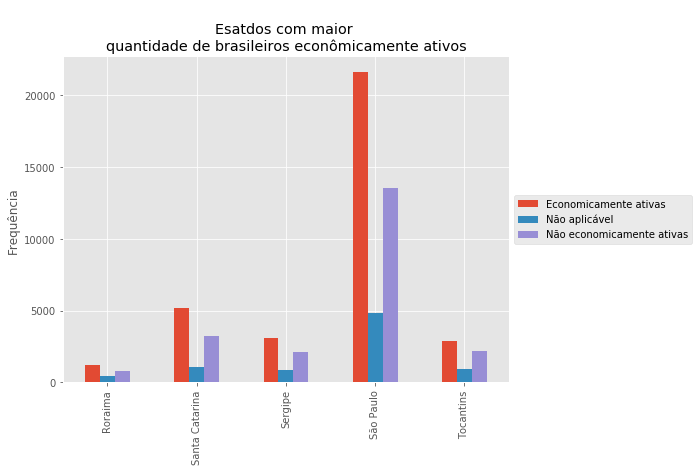

In [79]:
idade_condicao = (pd.crosstab(df_2015["UF"], df_2015["Condição de atividade"]))
plot = idade_condicao.tail(5).plot(kind="bar", figsize=(8,6))
ax = plt.subplot(111)
plt.title("\nEsatdos com maior \nquantidade de brasileiros econômicamente ativos")
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Frequência')
plt.xlabel('')
plt.show()

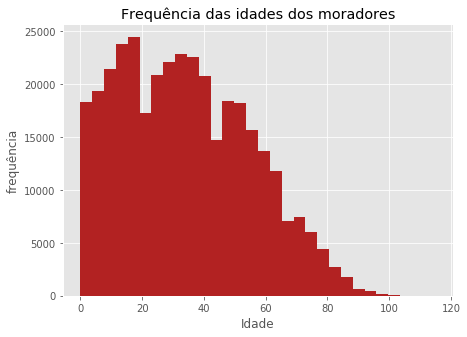

In [62]:
#
df_2015["Idade do morador"].plot.hist(bins=30, density = False, color="firebrick", figsize=(7, 5));
plt.title("Frequência das idades dos moradores")
plt.xlabel("Idade")
plt.ylabel("frequência")
plt.show()

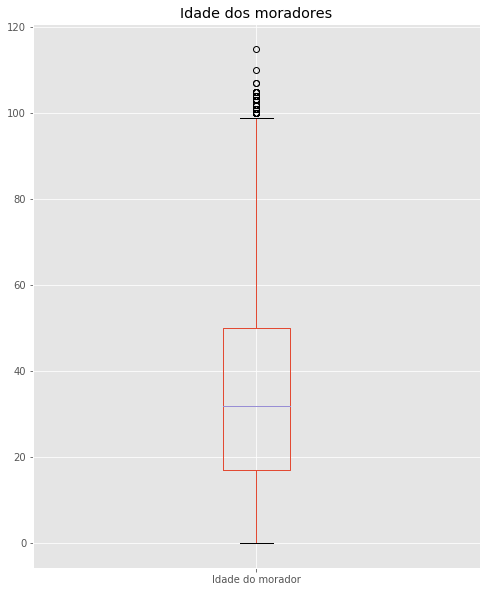

In [63]:
df_2015["Idade do morador"].plot("box", figsize=(8,10));
plt.title("Idade dos moradores")
plt.show()

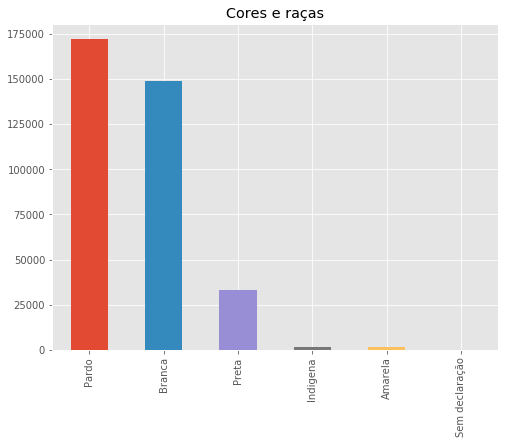

In [64]:
df_2015["Cor ou raça"].value_counts().plot("bar", figsize=(8,6));
plt.title("Cores e raças")
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!

In [ ]:
df_2015["Número de horas trabalhadas por semana no trabalho"].loc[df_2015["Número de horas trabalhadas por semana no trabalho"]!="Não aplicável"].plot("box", figsize=(8,10));
plt.title("Número de horas trabalhadas por semana no trabalho")
plt.show()